# Datafest Pandas


[*pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling and analyzing input data, and many ML frameworks support *pandas* data structures as inputs.
Although a comprehensive introduction to the *pandas* API would span many pages, the core concepts are fairly straightforward, and we'll present them below. For a more complete reference, the [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html) contains extensive documentation and many tutorials.

## Basic Concepts

The following line imports the *pandas* API and prints the API version:

In [0]:
from __future__ import print_function

import psycopg2

import pandas as pd
pd.__version__



/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


'0.25.3'

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.


One way to create a `Series` is to construct a `Series` object. For example:

In [0]:
pd.Series(['Red', 'White', 'Rosé'])

0      Red
1    White
2     Rosé
dtype: object

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [0]:
color = pd.Series(['Red', 'White', 'Rosé'])
type = pd.Series(['Still', 'Sparkling', 'Fortified'])

pd.DataFrame({ 'color': color, 'wine_type': type })

,color,wine_type
0,Red,Still
1,White,Sparkling
2,Rosé,Fortified


But most of the time, you load an entire file into a `DataFrame`. The following example loads Datafest wine Marks. Run the following cell to create your connection

In [0]:
PGHOST="datafest201912.library.ucdavis.edu"
PGDATABASE="postgres"
PGPORT="49152"
PGUSER="anon"
PGPASSWORD="anon"

conn_string = ("host={} port={} dbname={} user={} password={}") \
  .format(PGHOST, PGPORT, PGDATABASE, PGUSER, PGPASSWORD)

conn=psycopg2.connect(conn_string)


Next, make an SQL selection and save to a data frame:

In [0]:
# edit SQL string here
sql_command = "SELECT * FROM {}.{};".format("datafest", "mark")
marks = pd.read_sql(sql_command, conn)
marks.describe()

,implicator_top,implicator_left,implicator_bottom,implicator_right,region_top,region_left,region_bottom,region_right,vintage,bottle_price,case_price
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,62.000000,6.000000,6.000000
mean,1360.586510,1680.662757,1564.539589,2878.932551,1551.953079,1665.724340,3070.375367,3635.718475,1986.322581,1.753333,19.666667
std,1156.831104,1470.408209,1171.376107,1499.544232,1296.251783,1569.719123,1287.140636,1476.204670,18.805104,0.562909,6.047038
min,16.000000,48.000000,97.000000,220.000000,48.000000,-64.000000,49.000000,1040.000000,1952.000000,0.970000,11.500000
25%,395.000000,488.000000,557.000000,1580.000000,415.000000,256.000000,2212.000000,2768.000000,1970.000000,1.390000,15.500000
50%,985.000000,1104.000000,1261.000000,2728.000000,1157.000000,1084.000000,3140.000000,3640.000000,1993.500000,1.790000,20.000000
75%,2133.000000,3016.000000,2269.000000,3952.000000,2581.000000,3004.000000,3675.000000,4880.000000,2002.750000,2.115000,23.750000
max,4752.000000,5044.000000,5136.000000,5808.000000,5848.000000,4984.000000,5728.000000,5896.000000,2010.000000,2.490000,27.500000


The example above used `DataFrame.describe` to show interesting statistics about a `DataFrame`. Another useful function is `DataFrame.head`, which displays the first few records of a `DataFrame`:

In [0]:
marks.head()

,mark_id,page_id,user_id,type,implicator_top,implicator_left,implicator_bottom,implicator_right,region_top,region_left,region_bottom,region_right,section_title,wine_type,bottle_type,color,vintage,country,bottle_price,case_price,created
0,e5e144bd-8376-40ca-8cc1-cbce98f09afb,/collection/sherry-lehmann/D-005/d7160g/media/...,quinn,wine_type,256,3112,496,4872,696,2872,3264,5024,None,sparkling,None,None,NaN,None,NaN,NaN,2019-12-10 01:32:08.589580
1,c278fa82-83d3-42ae-bbd2-946cb0e4633f,/collection/sherry-lehmann/D-637/d7265p/media/...,quinn,vintage,1779,3228,1899,3740,2011,3052,2663,3912,None,None,None,None,1976.0,None,NaN,NaN,2019-12-10 18:15:20.614147
2,b53d3882-1b02-4435-9f0e-3548be90d430,/collection/sherry-lehmann/D-202/d7v30w/media/...,quinn,section_title,976,340,1180,972,800,256,4704,3760,Sherry-Lehmann Inc,None,None,None,NaN,None,NaN,NaN,2019-12-10 01:32:08.589580
3,12f951f6-cf4d-49d1-a07c-6362e62da9fe,/collection/sherry-lehmann/D-202/d7fw2v/media/...,quinn,section_title,528,560,784,3432,712,528,1560,3728,Red Wines of the Rhone Valley,None,None,None,NaN,None,NaN,NaN,2019-12-10 18:54:08.641467
4,3d78f51e-be01-4409-8ea4-d68587e0b200,/collection/sherry-lehmann/D-202/d7gw25/media/...,foo,section_title,864,240,1672,3592,1784,256,5224,3560,Red burgundies,None,None,None,NaN,None,NaN,NaN,2019-12-11 09:31:37.141384


Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdcf2d208d0>]],
      dtype=object)

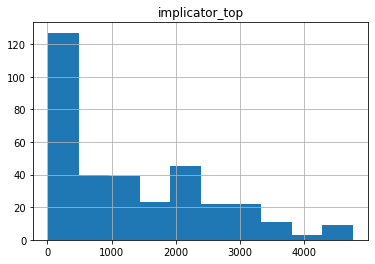

In [0]:
marks.hist('implicator_top')